In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

from sklearn import metrics

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# import data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_x = train_data.reshape(train_data.shape[0], -1).astype('float32')
test_x = test_data.reshape(test_data.shape[0], -1).astype('float32')

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# dont run this part, i'm still tuning
err_list = []
for i in np.arange(0.0, 1.0, 0.1):
    model = LGBMClassifier(objective='multiclass',path_smooth = i)
    model.fit(X_train,y_train,categorical_feature=[0,3])
    predictions = model.predict(X_test)
    error = sum(predictions!=y_test)/len(y_test)
    err_list.append(error)
err_list

In [ ]:
lgb_model = LGBMClassifier(objective='multiclass',path_smooth = 0.5)

In [ ]:
lgb_model.fit(train_x,train_labels,categorical_feature=[0,3])

C:\Users\asus\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier(objective='multiclass', path_smooth=0.5)

In [ ]:
expected_y  = test_labels
predicted_y = lgb_model.predict(test_x)
lightGBM_pred_y = predicted_y
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.79      0.83      0.81      1000
           3       0.90      0.91      0.90      1000
           4       0.81      0.82      0.82      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.66      0.69      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

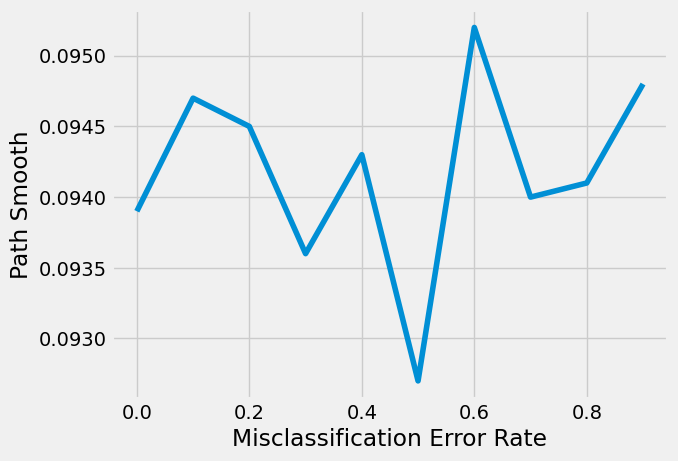

In [ ]:
tune = np.arange(0.0, 1.0, 0.1)
error = np.array(err_list)

plt.style.use("fivethirtyeight")
plt.plot(tune, error)

plt.xlabel("Misclassification Error Rate")
plt.ylabel("Path Smooth")

plt.show()

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=9)

In [ ]:
expected_y  = test_labels
lda_model = lda.fit(train_x, train_labels)
predicted_y = lda_model.predict(test_x)
lda_pred_y = predicted_y
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       1.00      0.93      0.96      1000
           2       0.70      0.68      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.70      0.74      0.72      1000
           5       0.89      0.89      0.89      1000
           6       0.54      0.56      0.55      1000
           7       0.88      0.89      0.89      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [ ]:
report = metrics.classification_report(expected_y, predicted_y, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.808533,0.7770,0.792453,1000.0000
1,0.996795,0.9330,0.963843,1000.0000
2,0.703093,0.6820,0.692386,1000.0000
3,0.801136,0.8460,0.822957,1000.0000
4,0.700943,0.7430,0.721359,1000.0000
5,0.886454,0.8900,0.888224,1000.0000
6,0.544922,0.5580,0.551383,1000.0000
7,0.883284,0.8930,0.888115,1000.0000
8,0.935910,0.9200,0.927887,1000.0000
9,0.913568,0.9090,0.911278,1000.0000


# SVM

In [5]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [6]:
# Use Ploynomial kernel 
svmpoly = svm.SVC(kernel='poly', degree=3, C=10).fit(train_x, train_labels)

In [7]:
expected_y  = test_labels
predicted_y = svmpoly.predict(test_x)
SVM_pred_y = predicted_y
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.82      0.81      1000
           3       0.88      0.88      0.88      1000
           4       0.84      0.78      0.81      1000
           5       0.93      0.97      0.95      1000
           6       0.72      0.69      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [8]:
report = metrics.classification_report(expected_y, predicted_y, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.787766,0.8500,0.817701,1000.0000
1,0.985801,0.9720,0.978852,1000.0000
2,0.791506,0.8200,0.805501,1000.0000
3,0.875125,0.8760,0.875562,1000.0000
4,0.841081,0.7780,0.808312,1000.0000
5,0.925287,0.9660,0.945205,1000.0000
6,0.720126,0.6870,0.703173,1000.0000
7,0.948156,0.9510,0.949576,1000.0000
8,0.967579,0.9550,0.961248,1000.0000
9,0.967513,0.9530,0.960202,1000.0000


In [ ]:
# to get the precision dictionary
out = {}
for i in range(0,10):
    out.update({i:round(report[str(i)]['precision'],2)})

In [ ]:
# create df of y_pred of test set for each model
y_pred_test = pd.concat([pd.DataFrame(lightGBM_pred_y, columns = ['LightGBM']),
           pd.DataFrame(lda_pred_y, columns = ['LDA']), 
           pd.DataFrame(SVM_pred_y, columns = ['SVM'])],axis=1)

In [ ]:
y_pred_test.to_csv('y_pred_test.csv')